# Challenge - Hardwork Pays Off

#### Input : You are given one feature corresponding to time noted by walkatime.

#### Output : A scalar denoting the level of perfomance student achived by devoting the given time.

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Importing Data

In [27]:
x_train = pd.read_csv("./Linear_X_Train.csv")
y_train = pd.read_csv("./Linear_Y_Train.csv")
x_test = pd.read_csv("./Linear_X_Test.csv")

In [53]:
# looking at the data we have
print(type(x_train))
print(x_train.shape)
x_train.head()

<class 'pandas.core.frame.DataFrame'>
(3750, 1)


,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [54]:
print(type(y_train))
print(y_train.shape)
y_train.head()

<class 'pandas.core.frame.DataFrame'>
(3750, 1)


,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [30]:
# normalizing [x = (x - mean)/std]

print("mean = ",x_train.mean())
print("std = ",x_train.std())

mean =  x   -0.037795
dtype: float64
std =  x    0.992212
dtype: float64


the data looks good, so normalization isn't needed

### 2. Visualizing Data

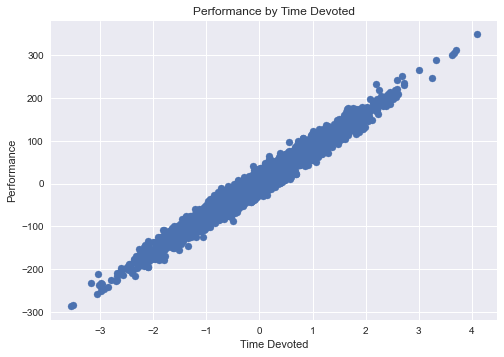

In [31]:
plt.style.use("seaborn")
plt.scatter(x_train,y_train)
plt.title("Performance by Time Devoted")
plt.xlabel("Time Devoted")
plt.ylabel("Performance")
plt.show()

### 3. Building LinearRegression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# building model
m = LinearRegression()

# training the model on train data
m.fit(x_train, y_train)

LinearRegression()

In [34]:
# r2 score
print(m.score(x_train, y_train))

0.9709612233822353


In [35]:
# getting the slope and intercept values of our best fit line
slope = m.coef_
intercept = m.intercept_

In [36]:
print("slope = ", slope)
print("intercept = ", intercept)

slope =  [[80.54363185]]
intercept =  [3.72798828]


### 4. Predicting the values

In [55]:
print(x_test.shape)
x_test.head()

(1250, 1)


,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [39]:
print("mean_test = ",x_test.mean())
print("std_test = ",x_test.std())

mean_test =  x   -0.040106
dtype: float64
std_test =  x    1.004994
dtype: float64


In [58]:
# method 1 (using slope and intercept)

y_pred_1 = slope*x_test + intercept

y_pred_1.rename(columns={'x':'y'}, inplace=True)

print(y_pred_1.shape)
y_pred_1.head()

(1250, 1)


,y
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [49]:
#  checking r2 score of the first prediction method
print(m.score(x_test, y_pred_1))

1.0


In [59]:
# method 2 (using predict function)

y_pred_2 = m.predict(x_test)
y_pred_2

array([[-147.52847525],
       [ -66.26699842],
       [-200.06209345],
       ...,
       [  14.0382031 ],
       [ -18.66616899],
       [ -51.07594693]])

In [67]:
y_pred_2 = pd.DataFrame(y_pred_2)
y_pred_2.rename(columns={0:'y'}, inplace=True)
y_pred_2.head()

,y
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [72]:
print(m.score(x_test, y_pred_2))

1.0


### 5. Visualising the prediction

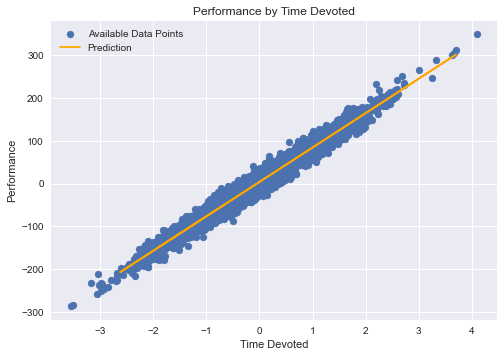

In [71]:
plt.style.use("seaborn")
plt.scatter(x_train,y_train, label="Available Data Points")
plt.plot(x_test['x'], y_pred_2['y'], color='orange', label="Prediction")
plt.title("Performance by Time Devoted")
plt.xlabel("Time Devoted")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [74]:
result = pd.DataFrame()

result['test_input'] = x_test
result['predicted_output'] = y_pred_2

result.head()

,test_input,predicted_output
0,-1.877944,-147.528475
1,-0.869032,-66.266998
2,-2.530182,-200.062093
3,2.760205,226.044960
4,0.591000,51.329285


In [79]:
y_pred_2.to_csv('prediction.csv', index=False)

In [80]:
df = pd.read_csv('./prediction.csv')
df.head()

,y
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285
